In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dabl

Data wrangling

## Objective  explore raw school score data 
1 import packages
2 load data 
3 join data on school code 

4 observe nulls and remove - found "*  " so need to convert data types after dealing with special characters

In [9]:
dfs = pd.read_csv('../../data/raw/sb_ca2021_1_csv_v2.txt' ,delimiter = "^")
dfs.drop('Filler',axis=1,inplace=True)
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100251 entries, 0 to 100250
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   County Code                                  100251 non-null  int64 
 1   District Code                                100251 non-null  int64 
 2   School Code                                  100251 non-null  int64 
 3   Test Year                                    100251 non-null  int64 
 4   Student Group ID                             100251 non-null  int64 
 5   Test Type                                    100251 non-null  object
 6   Total Tested at Reporting Level              100251 non-null  object
 7   Total Tested with Scores at Reporting Level  100251 non-null  object
 8   Grade                                        100251 non-null  int64 
 9   Test ID                                      100251 non-null  int64 
 

In [11]:
types = pd.read_csv('../../data/raw/test_types.txt' ,delimiter = "^")
# types.drop('Filler',axis=1,inplace=True)
types

,Test ID,Test ID Num,Test Name
0,1,1,SB - English Language Arts/Literacy
1,2,2,SB - Mathematics
2,3,3,CAA - English Language Arts/Literacy
3,4,4,CAA - Mathematics
4,17,17,CAST - California Science Test
5,18,18,CAA - Science
6,39,39,CSA - California Spanish Assessment


In [12]:
dfs['Test ID'].unique()

array([1, 2])

In [8]:
## unclear on this column atm 

dfs['Type ID'].value_counts()

7     73529
6     13504
9      9154
10     3122
5       926
4        16
Name: Type ID, dtype: int64

In [182]:
dfs.head()

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
0,0,0,0,2021,1,B,743626,736192,3,English Language Arts/Literacy,...,12.98,50.72,36.30,10.49,71.78,17.72,16.57,61.65,21.77,4
1,0,0,0,2021,1,B,743626,736192,4,English Language Arts/Literacy,...,13.48,53.53,32.99,11.20,71.90,16.89,15.35,66.49,18.16,4
2,0,0,0,2021,1,B,743626,736192,5,English Language Arts/Literacy,...,20.30,47.31,32.39,12.46,72.32,15.23,18.43,59.19,22.38,4
3,0,0,0,2021,1,B,743626,736192,6,English Language Arts/Literacy,...,16.27,49.77,33.96,13.76,70.17,16.07,19.33,63.41,17.26,4
4,0,0,0,2021,1,B,743626,736192,7,English Language Arts/Literacy,...,21.89,52.05,26.06,12.07,73.94,13.99,23.26,60.55,16.19,4


In [183]:
dfs[dfs['School Code']==0][['County Code','District Code','School Code']].nunique()

County Code       59
District Code    992
School Code        1
dtype: int64

In [184]:
dfs[dfs['School Code']==112607].T

,40,41,42,43,44,45,46,47
County Code,1,1,1,1,1,1,1,1
District Code,10017,10017,10017,10017,10017,10017,10017,10017
School Code,112607,112607,112607,112607,112607,112607,112607,112607
Test Year,2021,2021,2021,2021,2021,2021,2021,2021
Student Group ID,1,1,1,1,1,1,1,1
Test Type,B,B,B,B,B,B,B,B
Total Tested at Reporting Level,108,108,108,108,111,111,111,111
Total Tested with Scores at Reporting Level,106,106,106,106,105,105,105,105
Grade,6,7,11,13,6,7,11,13
Test ID,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy,Mathematics,Mathematics,Mathematics,Mathematics


## looks like if the there are not alot of students in a group the scores are with held. only had enough scores for 11th grade, if this is a trend I can use just those students instead of the slower schools 

In [14]:
dfs[dfs['School Code']==130401].T

,76,77,78,79,80,81,82,83
County Code,1,1,1,1,1,1,1,1
District Code,10017,10017,10017,10017,10017,10017,10017,10017
School Code,130401,130401,130401,130401,130401,130401,130401,130401
Test Year,2021,2021,2021,2021,2021,2021,2021,2021
Student Group ID,1,1,1,1,1,1,1,1
Test Type,B,B,B,B,B,B,B,B
Total Tested at Reporting Level,0,0,0,0,0,0,0,0
Total Tested with Scores at Reporting Level,0,0,0,0,0,0,0,0
Grade,7,8,11,13,7,8,11,13
Test ID,1,1,1,1,2,2,2,2


In [15]:
dfs[dfs['Students Tested']=='0']

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
32,1,10017,0,2021,1,B,5,5,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
33,1,10017,0,2021,1,B,5,5,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
36,1,10017,0,2021,1,B,5,5,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
37,1,10017,0,2021,1,B,5,5,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
62,1,10017,125567,2021,1,B,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100246,58,72769,133751,2021,1,B,0,0,13,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
100247,58,72769,5838305,2021,1,B,0,0,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
100248,58,72769,5838305,2021,1,B,0,0,13,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
100249,58,72769,5838305,2021,1,B,0,0,11,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [187]:
## Can drop all School where no students were tested

In [16]:
print(len(dfs))
drops = dfs[dfs['Students Tested']=='0'].index
len(drops)
dfs= dfs.drop(drops)
print(len(dfs))

#check nulls gone 
dfs[dfs['Students Tested']=='0']

100251
37977


,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID


# just under 38 k schools left after removing no students tested

In [17]:
dfs.duplicated(subset=['School Code','District Code','County Code']).sum()

33310

In [18]:
dfs.duplicated(subset=['Grade','Test ID','School Code','District Code']).sum()

918

In [19]:
dfs.duplicated(subset=['Grade','Test ID','School Code','District Code','County Code']).sum()

0

## To get unique row identifier need to use 5 columns listed above

In [20]:
dfs[dfs['District Code']==10017]

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
34,1,10017,0,2021,1,B,5,5,11,1,...,*,*,*,*,*,*,*,*,*,6
35,1,10017,0,2021,1,B,5,5,13,1,...,*,*,*,*,*,*,*,*,*,6
38,1,10017,0,2021,1,B,5,5,11,2,...,*,*,*,*,*,*,*,*,*,6
39,1,10017,0,2021,1,B,5,5,13,2,...,*,*,*,*,*,*,*,*,*,6
40,1,10017,112607,2021,1,B,108,106,6,1,...,*,*,*,*,*,*,*,*,*,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,10017,137448,2021,1,B,196,195,13,2,...,3.08,44.10,52.82,3.08,61.03,35.90,0.00,0.00,0.00,9
135,1,10017,6002000,2021,1,B,160,159,6,1,...,4.26,51.06,44.68,13.04,60.87,26.09,12.77,70.21,17.02,9
136,1,10017,6002000,2021,1,B,160,159,7,1,...,20.00,56.36,23.64,16.36,69.09,14.55,25.45,67.27,7.27,9
137,1,10017,6002000,2021,1,B,160,159,8,1,...,8.77,77.19,14.04,17.54,73.68,8.77,45.61,49.12,5.26,9


In [21]:
## load school / district name data

In [23]:
entities = pd.read_csv('../../data/raw/sb_ca2021entities_csv.txt',delimiter='^')
entities.drop('Filler',axis=1,inplace=True)
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County Code    11149 non-null  int64  
 1   District Code  11149 non-null  int64  
 2   School Code    11149 non-null  int64  
 3   Test Year      11149 non-null  int64  
 4   Type ID        11149 non-null  int64  
 5   County Name    11149 non-null  object 
 6   District Name  11090 non-null  object 
 7   School Name    10099 non-null  object 
 8   Zip Code       10099 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 784.0+ KB


In [24]:
entities['School Code'].nunique()

10100

In [25]:
entities.head()

,County Code,District Code,School Code,Test Year,Type ID,County Name,District Name,School Name,Zip Code
0,0,0,0,2021,4,State of California,NaN,NaN,NaN
1,1,0,0,2021,5,Alameda,NaN,NaN,NaN
2,1,10017,0,2021,6,Alameda,Alameda County Office of Education,NaN,NaN
3,1,10017,112607,2021,9,Alameda,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,94612.0
4,1,10017,124172,2021,9,Alameda,Yu Ming Charter,Yu Ming Charter,94608.0


## merge data sets

In [66]:
df = dfs.merge(entities,how='left',on=['School Code','District Code','County Code'])
df.drop('Test Type' ,inplace=True,axis=1) # all are 'B'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37977 entries, 0 to 37976
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County Code                                  37977 non-null  int64  
 1   District Code                                37977 non-null  int64  
 2   School Code                                  37977 non-null  int64  
 3   Test Year_x                                  37977 non-null  int64  
 4   Student Group ID                             37977 non-null  int64  
 5   Total Tested at Reporting Level              37977 non-null  object 
 6   Total Tested with Scores at Reporting Level  37977 non-null  object 
 7   Grade                                        37977 non-null  int64  
 8   Test ID                                      37977 non-null  int64  
 9   Students Enrolled                            37977 non-null  object 
 10

In [67]:
df['Test ID'].value_counts()

2    19085
1    18892
Name: Test ID, dtype: int64

In [68]:
df[['County Code', 'District Code','School Code']].nunique()

County Code        59
District Code     786
School Code      3858
dtype: int64

In [69]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Zip Code,9248.0,24.351581
School Name,9248.0,24.351581
Mean Scale Score,9213.0,24.259420
District Name,934.0,2.459383
Percentage Standard Not Met,39.0,0.102694
Area 4 Percentage Below Standard,39.0,0.102694
Area 4 Percentage Near Standard,39.0,0.102694
Area 4 Percentage Above Standard,39.0,0.102694
Area 3 Percentage Below Standard,39.0,0.102694
Area 3 Percentage Near Standard,39.0,0.102694


In [70]:
# remove rows with no school Name 
print(len(df))
df.drop(df[df['School Name'].isnull()].index,inplace=True)
# remove area score nulls
df.drop(df[df['Area 2 Percentage Below Standard'].isnull()].index,inplace=True)
print(len(df))
df[df['School Name'].isnull()].index

37977
28698


Int64Index([], dtype='int64')

In [71]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Mean Scale Score,7566.0,26.364207
County Code,0.0,0.000000
Area 4 Percentage Above Standard,0.0,0.000000
Area 2 Percentage Above Standard,0.0,0.000000
Area 2 Percentage Near Standard,0.0,0.000000
Area 2 Percentage Below Standard,0.0,0.000000
Area 3 Percentage Above Standard,0.0,0.000000
Area 3 Percentage Near Standard,0.0,0.000000
Area 3 Percentage Below Standard,0.0,0.000000
Area 4 Percentage Near Standard,0.0,0.000000


In [201]:
df[df['Mean Scale Score'].isnull()].sample(5).T

,7152,17697,4226,10399,35322
County Code,15,31,10,19,54
District Code,63651,10314,73965,64725,72256
School Code,6009773,3130259,1030386,1964725,5434527
Test Year_x,2021,2021,2021,2021,2021
Student Group ID,1,1,1,1,1
Test Type,B,B,B,B,B
Total Tested at Reporting Level,46,9,26,26,25
Total Tested with Scores at Reporting Level,46,9,26,25,25
Grade,13,13,13,13,13
Test ID,Mathematics,Mathematics,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy


# Keep mean scale score even if mean scale score = Nan as other columns still giving data 

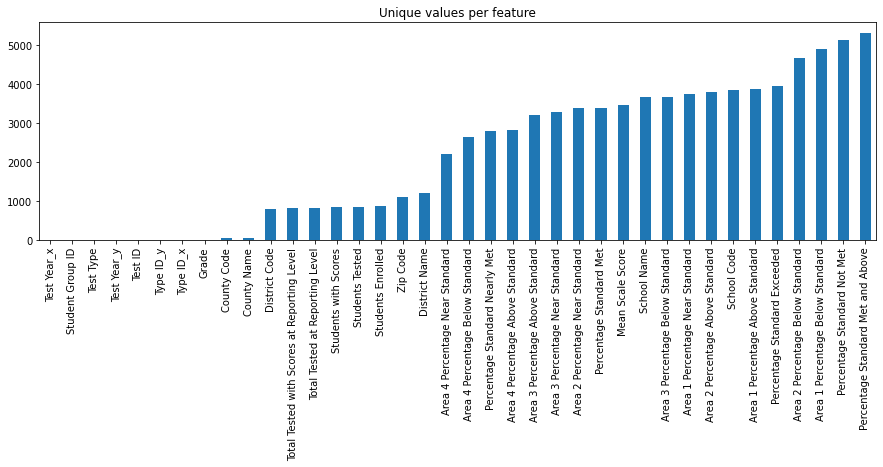

In [58]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

In [107]:

# for col in df.select_dtypes('object'):
#     print(col)
#     df[col] = df[col].str.replace('*','')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28698 entries, 36 to 37976
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County Code                                  28698 non-null  int64  
 1   District Code                                28698 non-null  int64  
 2   School Code                                  28698 non-null  int64  
 3   Test Year_x                                  28698 non-null  int64  
 4   Student Group ID                             28698 non-null  int64  
 5   Test Type                                    28698 non-null  object 
 6   Total Tested at Reporting Level              28698 non-null  object 
 7   Total Tested with Scores at Reporting Level  28698 non-null  object 
 8   Grade                                        28698 non-null  int64  
 9   Test ID                                      28698 non-null  int64  
 1

In [72]:
cols = df.columns[df.dtypes.eq('object')]

convert = cols[:-3]
convert

Index(['Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard', 'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard', 'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard', 'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard', 'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard', 'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard'],
      dtype='object')

In [73]:
df[convert] = df[convert].apply(pd.to_numeric,errors='coerce')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28698 entries, 36 to 37976
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County Code                                  28698 non-null  int64  
 1   District Code                                28698 non-null  int64  
 2   School Code                                  28698 non-null  int64  
 3   Test Year_x                                  28698 non-null  int64  
 4   Student Group ID                             28698 non-null  int64  
 5   Total Tested at Reporting Level              27490 non-null  float64
 6   Total Tested with Scores at Reporting Level  27473 non-null  float64
 7   Grade                                        28698 non-null  int64  
 8   Test ID                                      28698 non-null  int64  
 9   Students Enrolled                            27037 non-null  float64
 1

In [77]:
# convert test types to name 
df['Test ID'] = df['Test ID'].map({1:'English Language Arts/Literacy',2:'Mathematics'})
df['Test ID'].unique()

array(['English Language Arts/Literacy', 'Mathematics'], dtype=object)

In [78]:
df.sample(4).T

,33513,32085,32205,1102
County Code,51,50,50,4
District Code,71464,71142,71167,61382
School Code,5171464,6052609,6052708,6002919
Test Year_x,2021,2021,2021,2021
Student Group ID,1,1,1,1
Total Tested at Reporting Level,NaN,79.0,287.0,63.0
Total Tested with Scores at Reporting Level,NaN,79.0,286.0,63.0
Grade,4,6,3,5
Test ID,Mathematics,Mathematics,Mathematics,Mathematics
Students Enrolled,NaN,13.0,72.0,16.0


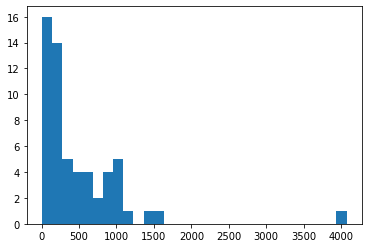

In [79]:
dist_nums = df['County Name'].value_counts()
plt.hist(dist_nums,bins=30)
plt.show()

In [ ]:
## per county reporting school count

In [80]:


df['County Name'].value_counts()

Los Angeles        4072
San Diego          1628
San Joaquin        1366
Santa Clara        1224
Ventura            1085
Stanislaus         1080
Fresno             1059
San Mateo          1015
Tulare             1000
Orange              885
Shasta              869
Sacramento          862
San Bernardino      828
Riverside           694
Kern                694
Alameda             638
Placer              634
Contra Costa        600
Humboldt            583
Marin               515
Sonoma              478
Butte               437
Kings               418
El Dorado           382
Siskiyou            360
Merced              346
Tehama              344
Yuba                300
Sutter              271
Lake                269
Madera              248
San Luis Obispo     246
Mendocino           236
Nevada              235
Imperial            224
Tuolumne            215
Santa Barbara       214
Glenn               201
Lassen              196
Monterey            174
Trinity             164
San Francisco   

Target looks like regression
Showing only top 10 of 26 continuous features


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column Area 3 Percentage Above Standard.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Area 4 Percentage Above Standard.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: 

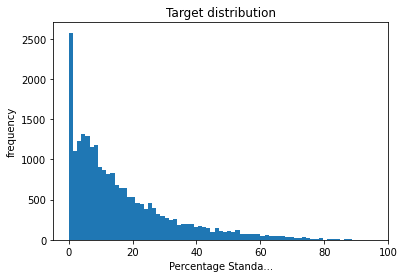

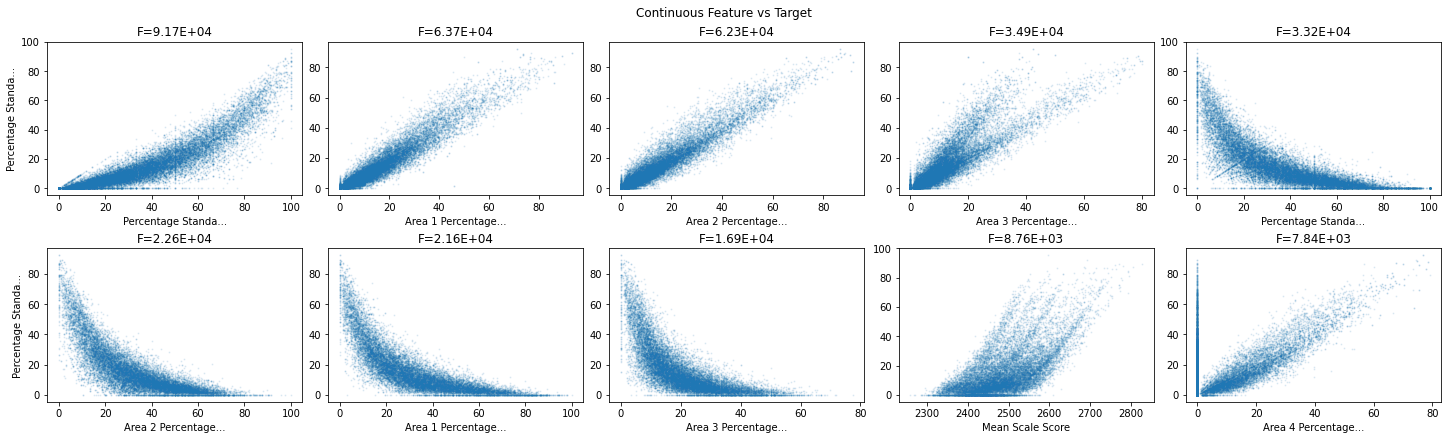

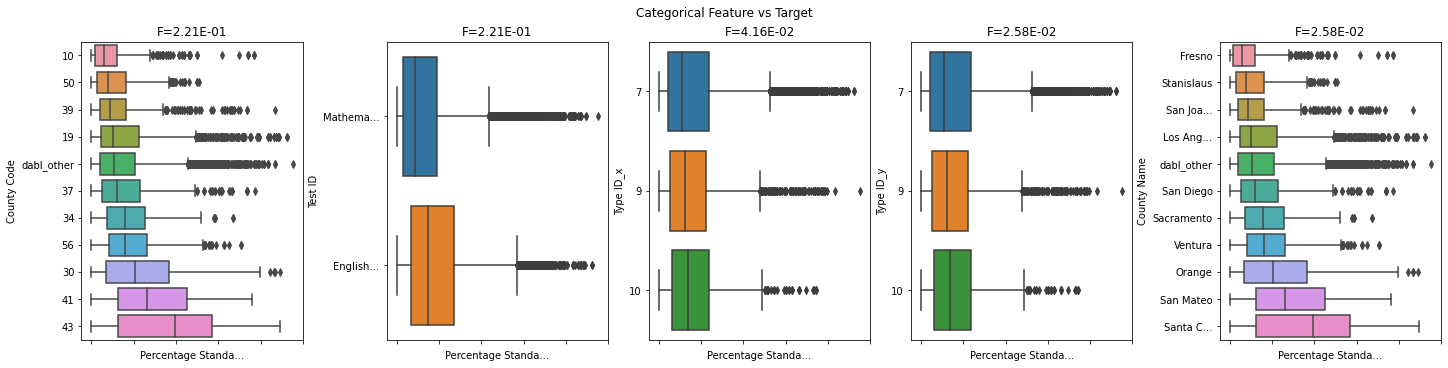

In [81]:
dabl.plot(df, target_col = 'Percentage Standard Exceeded')
plt.show()

In [82]:
df['Students with Scores'].nunique()

835

In [223]:
df['Percentage Standard Exceeded'].nunique() 

3960

In [83]:
df.to_csv('../../data/processed/cleaned_labeled_2021-SB_math_ela_scores.csv')

In [94]:
score_means = df.groupby('County Name')[['Percentage Standard Met','Percentage Standard Exceeded','Percentage Standard Not Met']].mean()
score_means['difference'] = score_means['Percentage Standard Exceeded']-score_means['Percentage Standard Not Met']
score_means.sort_values(by='Percentage Standard Exceeded',ascending=False).head(7)

,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Not Met,difference
County Name,,,,
Santa Clara,21.951805,36.914298,23.598873,13.315425
Santa Cruz,28.984872,32.394872,17.132436,15.262436
San Mateo,24.237346,29.509331,25.618136,3.891195
Alameda,24.326453,26.593962,27.278698,-0.684736
Alpine,20.000000,24.285000,35.715000,-11.430000
Orange,22.934408,23.214041,31.456776,-8.242735
Marin,24.584791,23.177939,29.151755,-5.973816


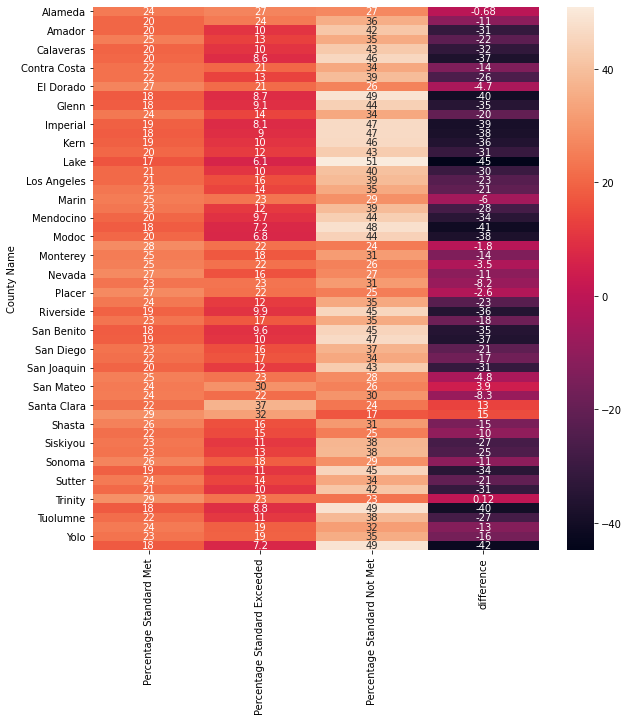

In [93]:
import seaborn as sns
ax,plot = plt.subplots(figsize=(10,10))
ax = sns.heatmap(score_means,annot=True)

In [105]:
district_means = df.groupby(['District Name','Test ID'])[['Percentage Standard Met','Percentage Standard Exceeded','Percentage Standard Not Met']].mean()
district_means['difference'] = district_means['Percentage Standard Exceeded']-district_means['Percentage Standard Not Met']
district_means.sort_values(by='Percentage Standard Exceeded',ascending=False).head(15)

Percentage Standard Met  \
District Name                          Test ID                                                   
University High                        English Language Arts/Literacy                22.020000   
Bullis Charter                         Mathematics                                   16.570000   
Fremont Union High                     Mathematics                                   13.504000   
                                       English Language Arts/Literacy                18.228000   
Lompoc Unified                         English Language Arts/Literacy                15.790000   
Yu Ming Charter                        Mathematics                                   15.767143   
Union Street Charter                   English Language Arts/Literacy                16.795000   
Cold Spring Elementary                 Mathematics                                   25.150000   
Albany City Unified                    English Language Arts/Literacy                20.830000   
Berkeley Unified                       English Language Arts/Literacy                25.680000   
Saratoga Union Elementary              Mathematics                                   20.412500   
San Ramon Valley Unified               English Language Arts/Literacy                24.906667   
ABC Unified                            English Language Arts/Literacy                25.137188   
University Preparatory Academy Charter English Language Arts/Literacy                20.950000   
Bullis Charter                         English Language Arts/Literacy                25.031429   

                                                                       Percentage Standard Exceeded  \
District Name                          Test ID                                                        
University High                        English Language Arts/Literacy                     77.060000   
Bullis Charter                         Mathematics                                        75.405714   
Fremont Union High                     Mathematics                                        75.366000   
                                       English Language Arts/Literacy                     73.800000   
Lompoc Unified                         English Language Arts/Literacy                     73.680000   
Yu Ming Charter                        Mathematics                                        73.677143   
Union Street Charter                   English Language Arts/Literacy                     72.960000   
Cold Spring Elementary                 Mathematics                                        70.464000   
Albany City Unified                    English Language Arts/Literacy                     70.370000   
Berkeley Unified                       English Language Arts/Literacy                     70.270000   
Saratoga Union Elementary              Mathematics                                        67.673125   
San Ramon Valley Unified               English Language Arts/Literacy                     67.500000   
ABC Unified                            English Language Arts/Literacy                     65.746562   
University Preparatory Academy Charter English Language Arts/Literacy                     65.710000   
Bullis Charter                         English Language Arts/Literacy                     65.610000   

                                                                       Percentage Standard Not Met  \
District Name                          Test ID                                                       
University High                        English Language Arts/Literacy                     0.920000   
Bullis Charter                         Mathematics                                        2.005714   
Fremont Union High                     Mathematics                                        4.632000   
                                       English Language Arts/Literacy                     1.714000   
Lompoc Unified                         E

In [104]:
score_means.sample(5)

,,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Not Met,difference
District Name,Test ID,,,,
Planada Elementary,English Language Arts/Literacy,22.10125,5.44125,40.5450,-35.10375
Venture Academy,Mathematics,8.85250,5.96500,56.5250,-50.56000
Conservatory of Vocal/Instrumental Arts,English Language Arts/Literacy,NaN,NaN,NaN,NaN
San Jacinto Unified,Mathematics,10.88000,2.55000,62.2700,-59.72000
Valiente College Preparatory Charter,Mathematics,4.00250,2.47750,71.3625,-68.88500


In [106]:
district_means.sort_values(by='Percentage Standard Exceeded').head(15)

Percentage Standard Met  \
District Name                           Test ID                                                   
one.Charter                             Mathematics                                       0.000   
The Education Corps                     Mathematics                                       0.000   
Madera County Superintendent of Schools Mathematics                                       0.000   
Magnolia Science Academy 5              English Language Arts/Literacy                   30.770   
Eel River Charter                       Mathematics                                       0.000   
Blake Elementary                        English Language Arts/Literacy                   46.150   
                                        Mathematics                                      23.080   
Eel River Charter                       English Language Arts/Literacy                    1.565   
Marconi Learning Academy                Mathematics                                       2.600   
Biggs Unified                           Mathematics                                       4.260   
City Heights Preparatory Charter        Mathematics                                       4.545   
TEACH Preparatory Mildred S. Cunningham Mathematics                                      11.110   
                                        English Language Arts/Literacy                    9.090   
Mendocino County Office of Education    English Language Arts/Literacy                   10.340   
                                        Mathematics                                       3.570   

                                                                        Percentage Standard Exceeded  \
District Name                           Test ID                                                        
one.Charter                             Mathematics                                              0.0   
The Education Corps                     Mathematics                                              0.0   
Madera County Superintendent of Schools Mathematics                                              0.0   
Magnolia Science Academy 5              English Language Arts/Literacy                           0.0   
Eel River Charter                       Mathematics                                              0.0   
Blake Elementary                        English Language Arts/Literacy                           0.0   
                                        Mathematics                                              0.0   
Eel River Charter                       English Language Arts/Literacy                           0.0   
Marconi Learning Academy                Mathematics                                              0.0   
Biggs Unified                           Mathematics                                              0.0   
City Heights Preparatory Charter        Mathematics                                              0.0   
TEACH Preparatory Mildred S. Cunningham Mathematics                                              0.0   
                                        English Language Arts/Literacy                           0.0   
Mendocino County Office of Education    English Language Arts/Literacy                           0.0   
                                        Mathematics                                              0.0   

                                                                        Percentage Standard Not Met  \
District Name                           Test ID                                                       
one.Charter                             Mathematics                                          94.975   
The Education Corps                     Mathematics                                          91.670   
Madera County Superintendent of Schools Mathematics                                          90.618   
Magnolia Science Academy 5              English Language Arts/Literacy                       46.150   
E